# Optional script to calibrate the Logistic Regression results and plot

In [14]:
import pandas as pd
import numpy as np
import pickle

import sys
sys.path.append('../onc_functions')

# import custom functions
from plot_functions import onc_plot_calibration_curve, onc_plot_risk, onc_plot_roc, onc_plot_roc_no_threshold
from calibrate_onc import calibrate_onc

In [3]:
with open('./results/2021_final_LR_model_test_pred_proba_pooled.pickle','rb') as f:  
    data = pickle.load(f)

data = data.loc[:,['score','died_in_90','subset','usrds_id']]
data = data.rename(columns={'died_in_90':'y'})
data.head()

,score,y,subset,usrds_id
0,0.918726,1.0,9,31089.0
1,0.784944,0.0,8,34521.0
2,0.484961,0.0,8,46751.0
3,0.629407,0.0,9,50506.0
4,0.194189,0.0,8,54985.0


# Plot original model's calibration cuve

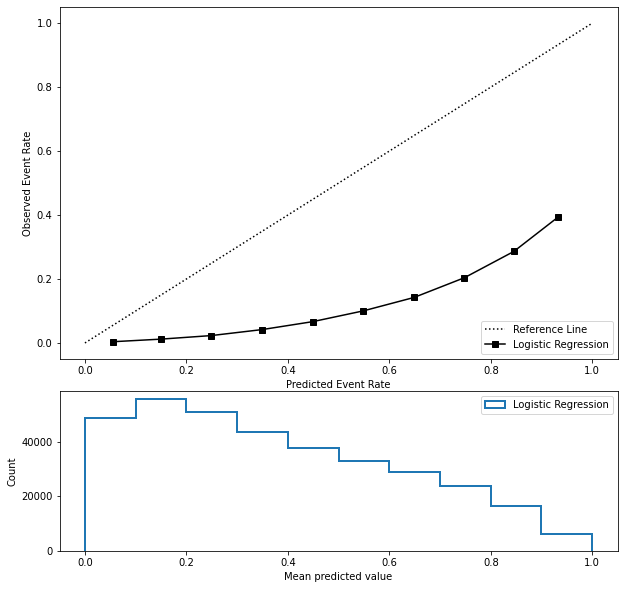

In [4]:
onc_plot_calibration_curve(
                y_true=data.y, 
                y_proba=data.score, 
                label='Logistic Regression',
                filename='./results/lr_orig_calibration')

# plot original model mortality risk

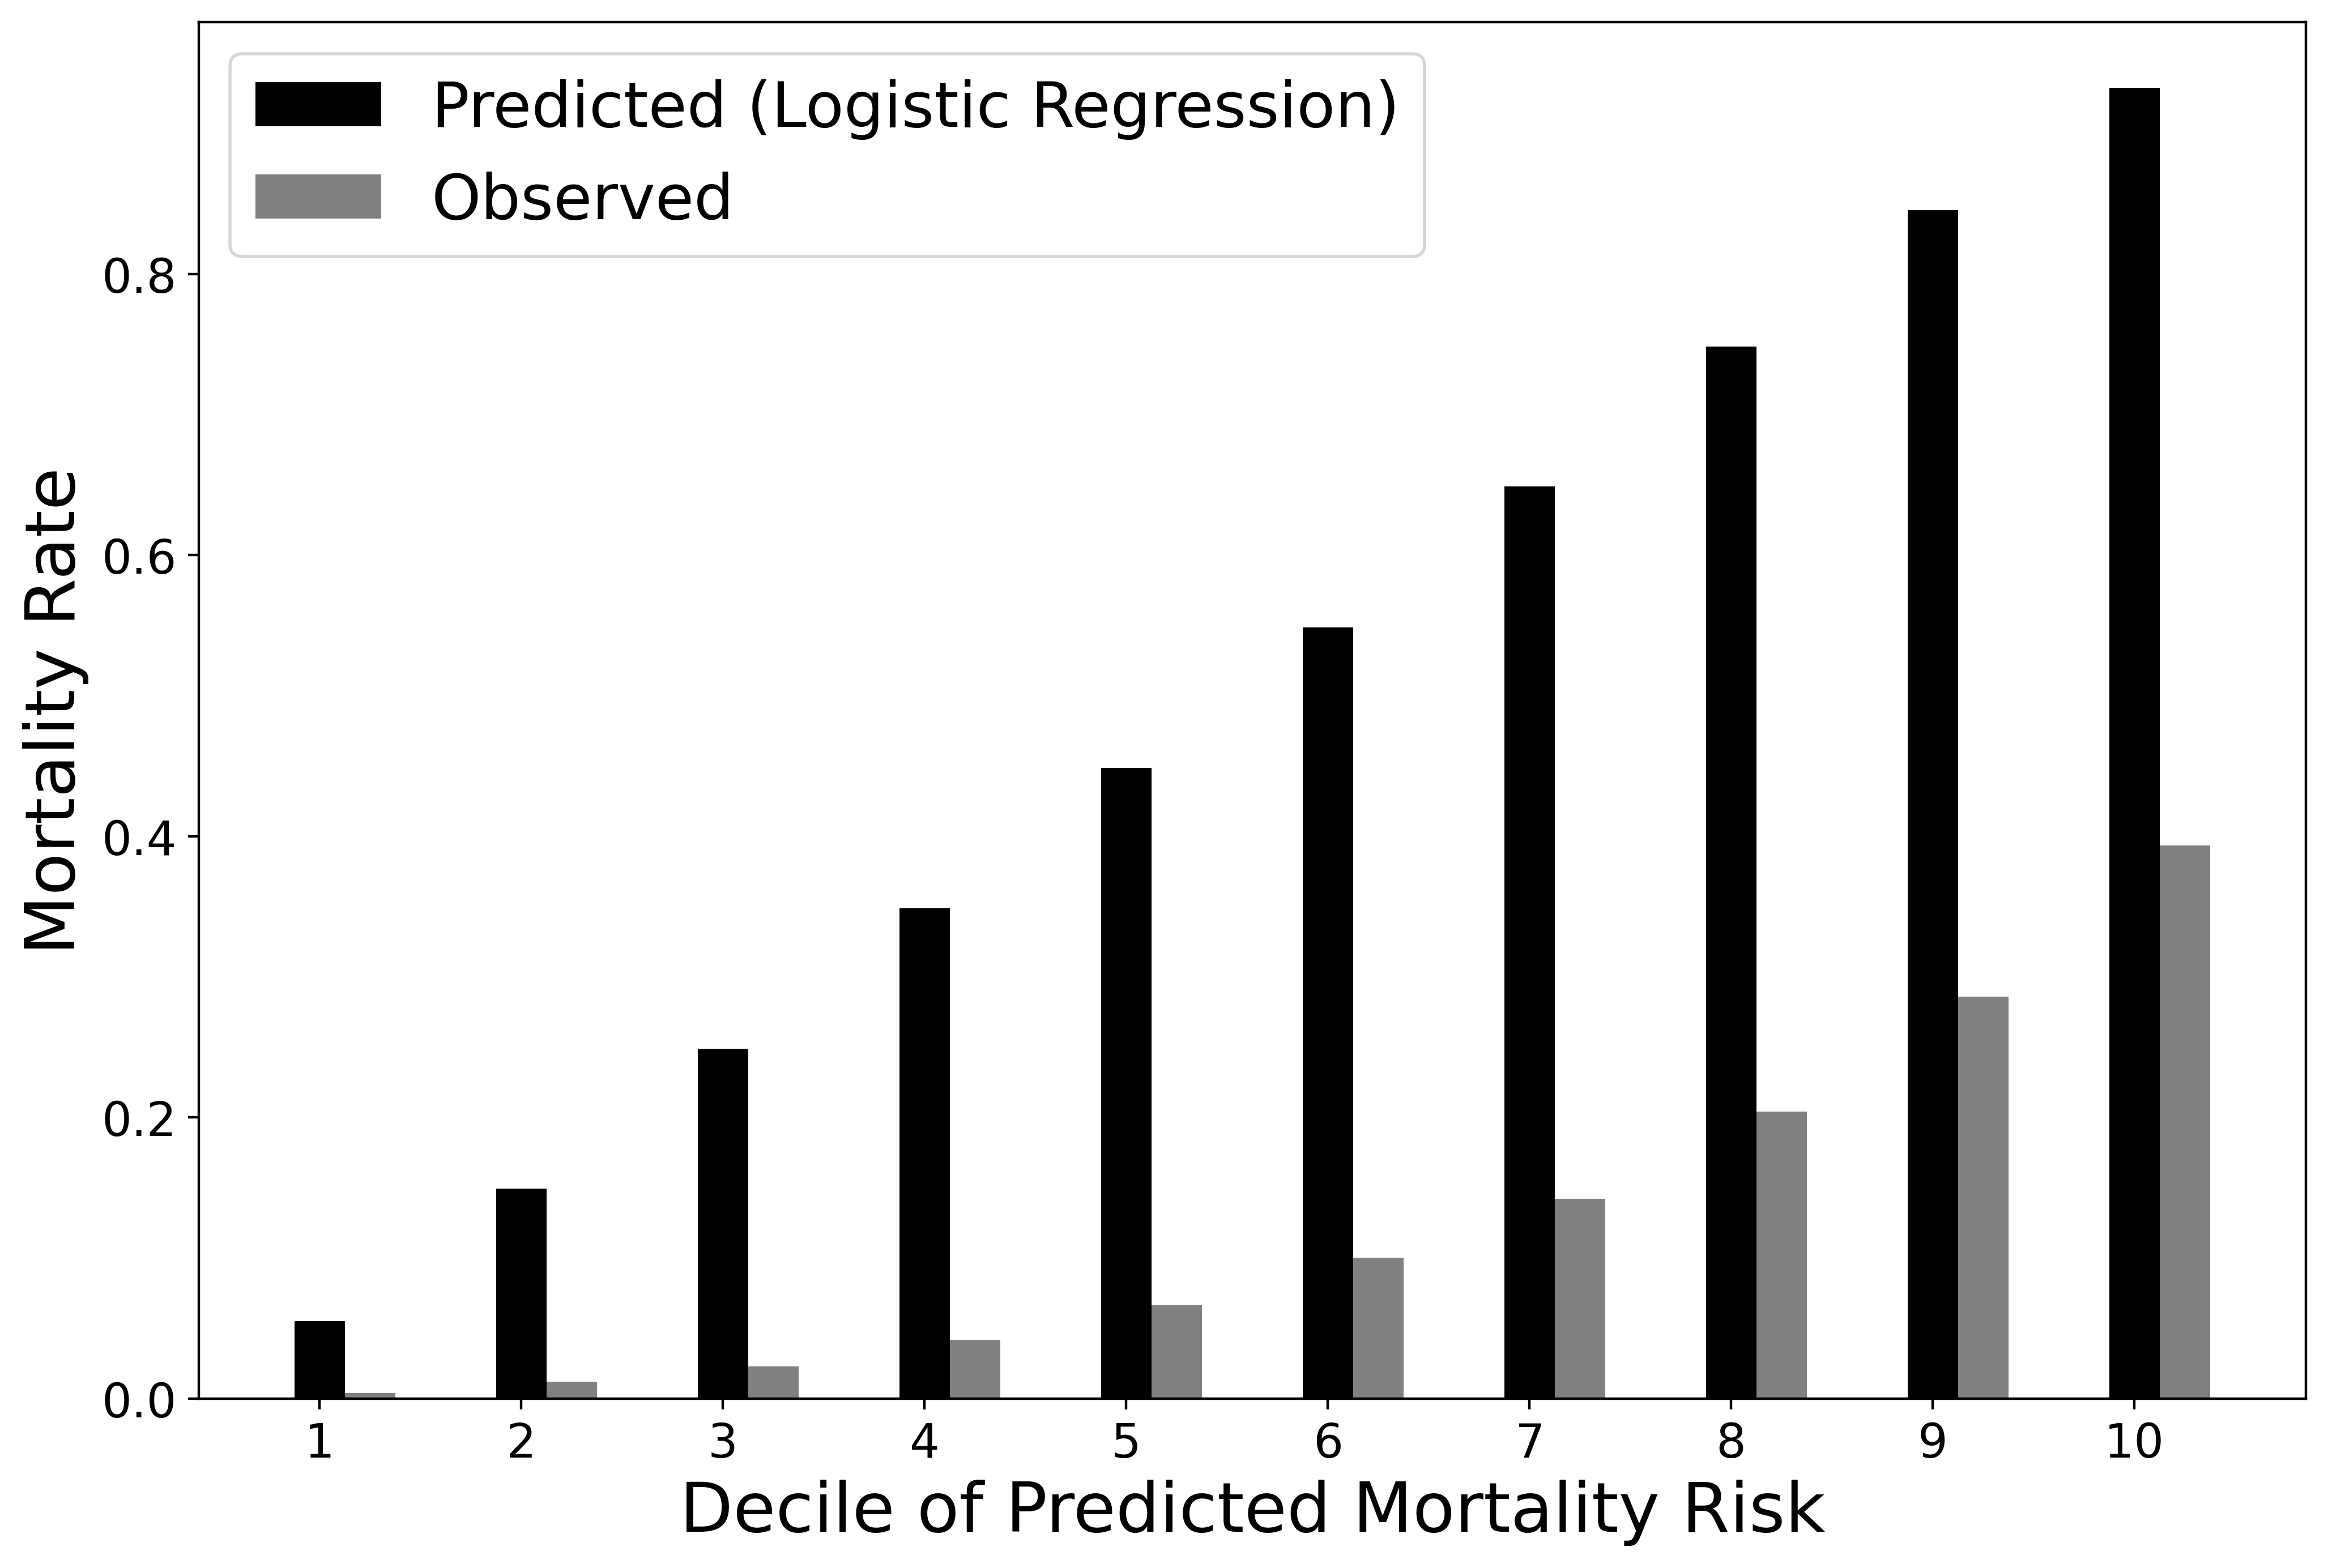

In [17]:
onc_plot_risk(
    y_true=data.y, 
    y_proba=data.score, 
    label='Predicted (Logistic Regression)',
    filename='lr_not_calibrated_mortality_bar')

# Calibrate model
### model can be calibrated by training an isotonic regression on a portion of the testing set. 

In order to split the predictions from the test set into a new test/train set for the classifier, pull in the subset information from the postgres data and merge it with the predictions from the LR model.

In [5]:
calibrated_results = calibrate_onc(data, path='./results/', model_name='lr')

accuracy - original/calibrated: 0.7261524259077015 / 0.925476603119584
ROC AUC - original/calibrated:      0.8127091890156175 / 0.8123671017958832
avg precision - original/calibrated: 0.26026449800744755 / 0.25494374411559184
	Brier: 0.061


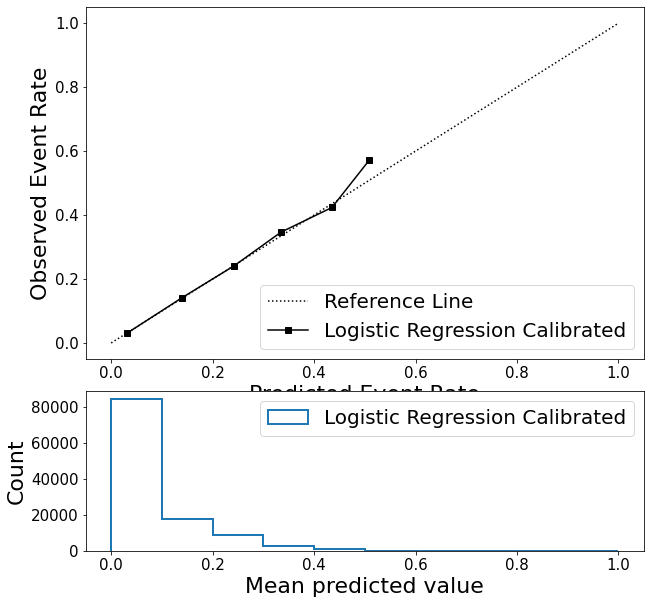

In [7]:
# for plotting the calibration curve of the calibrated model
onc_plot_calibration_curve(
                y_true=calibrated_results.y, 
                y_proba=calibrated_results.p_calibrated, 
                label='Logistic Regression Calibrated',
                filename='./results/lr_calibration_curve_calibrated')

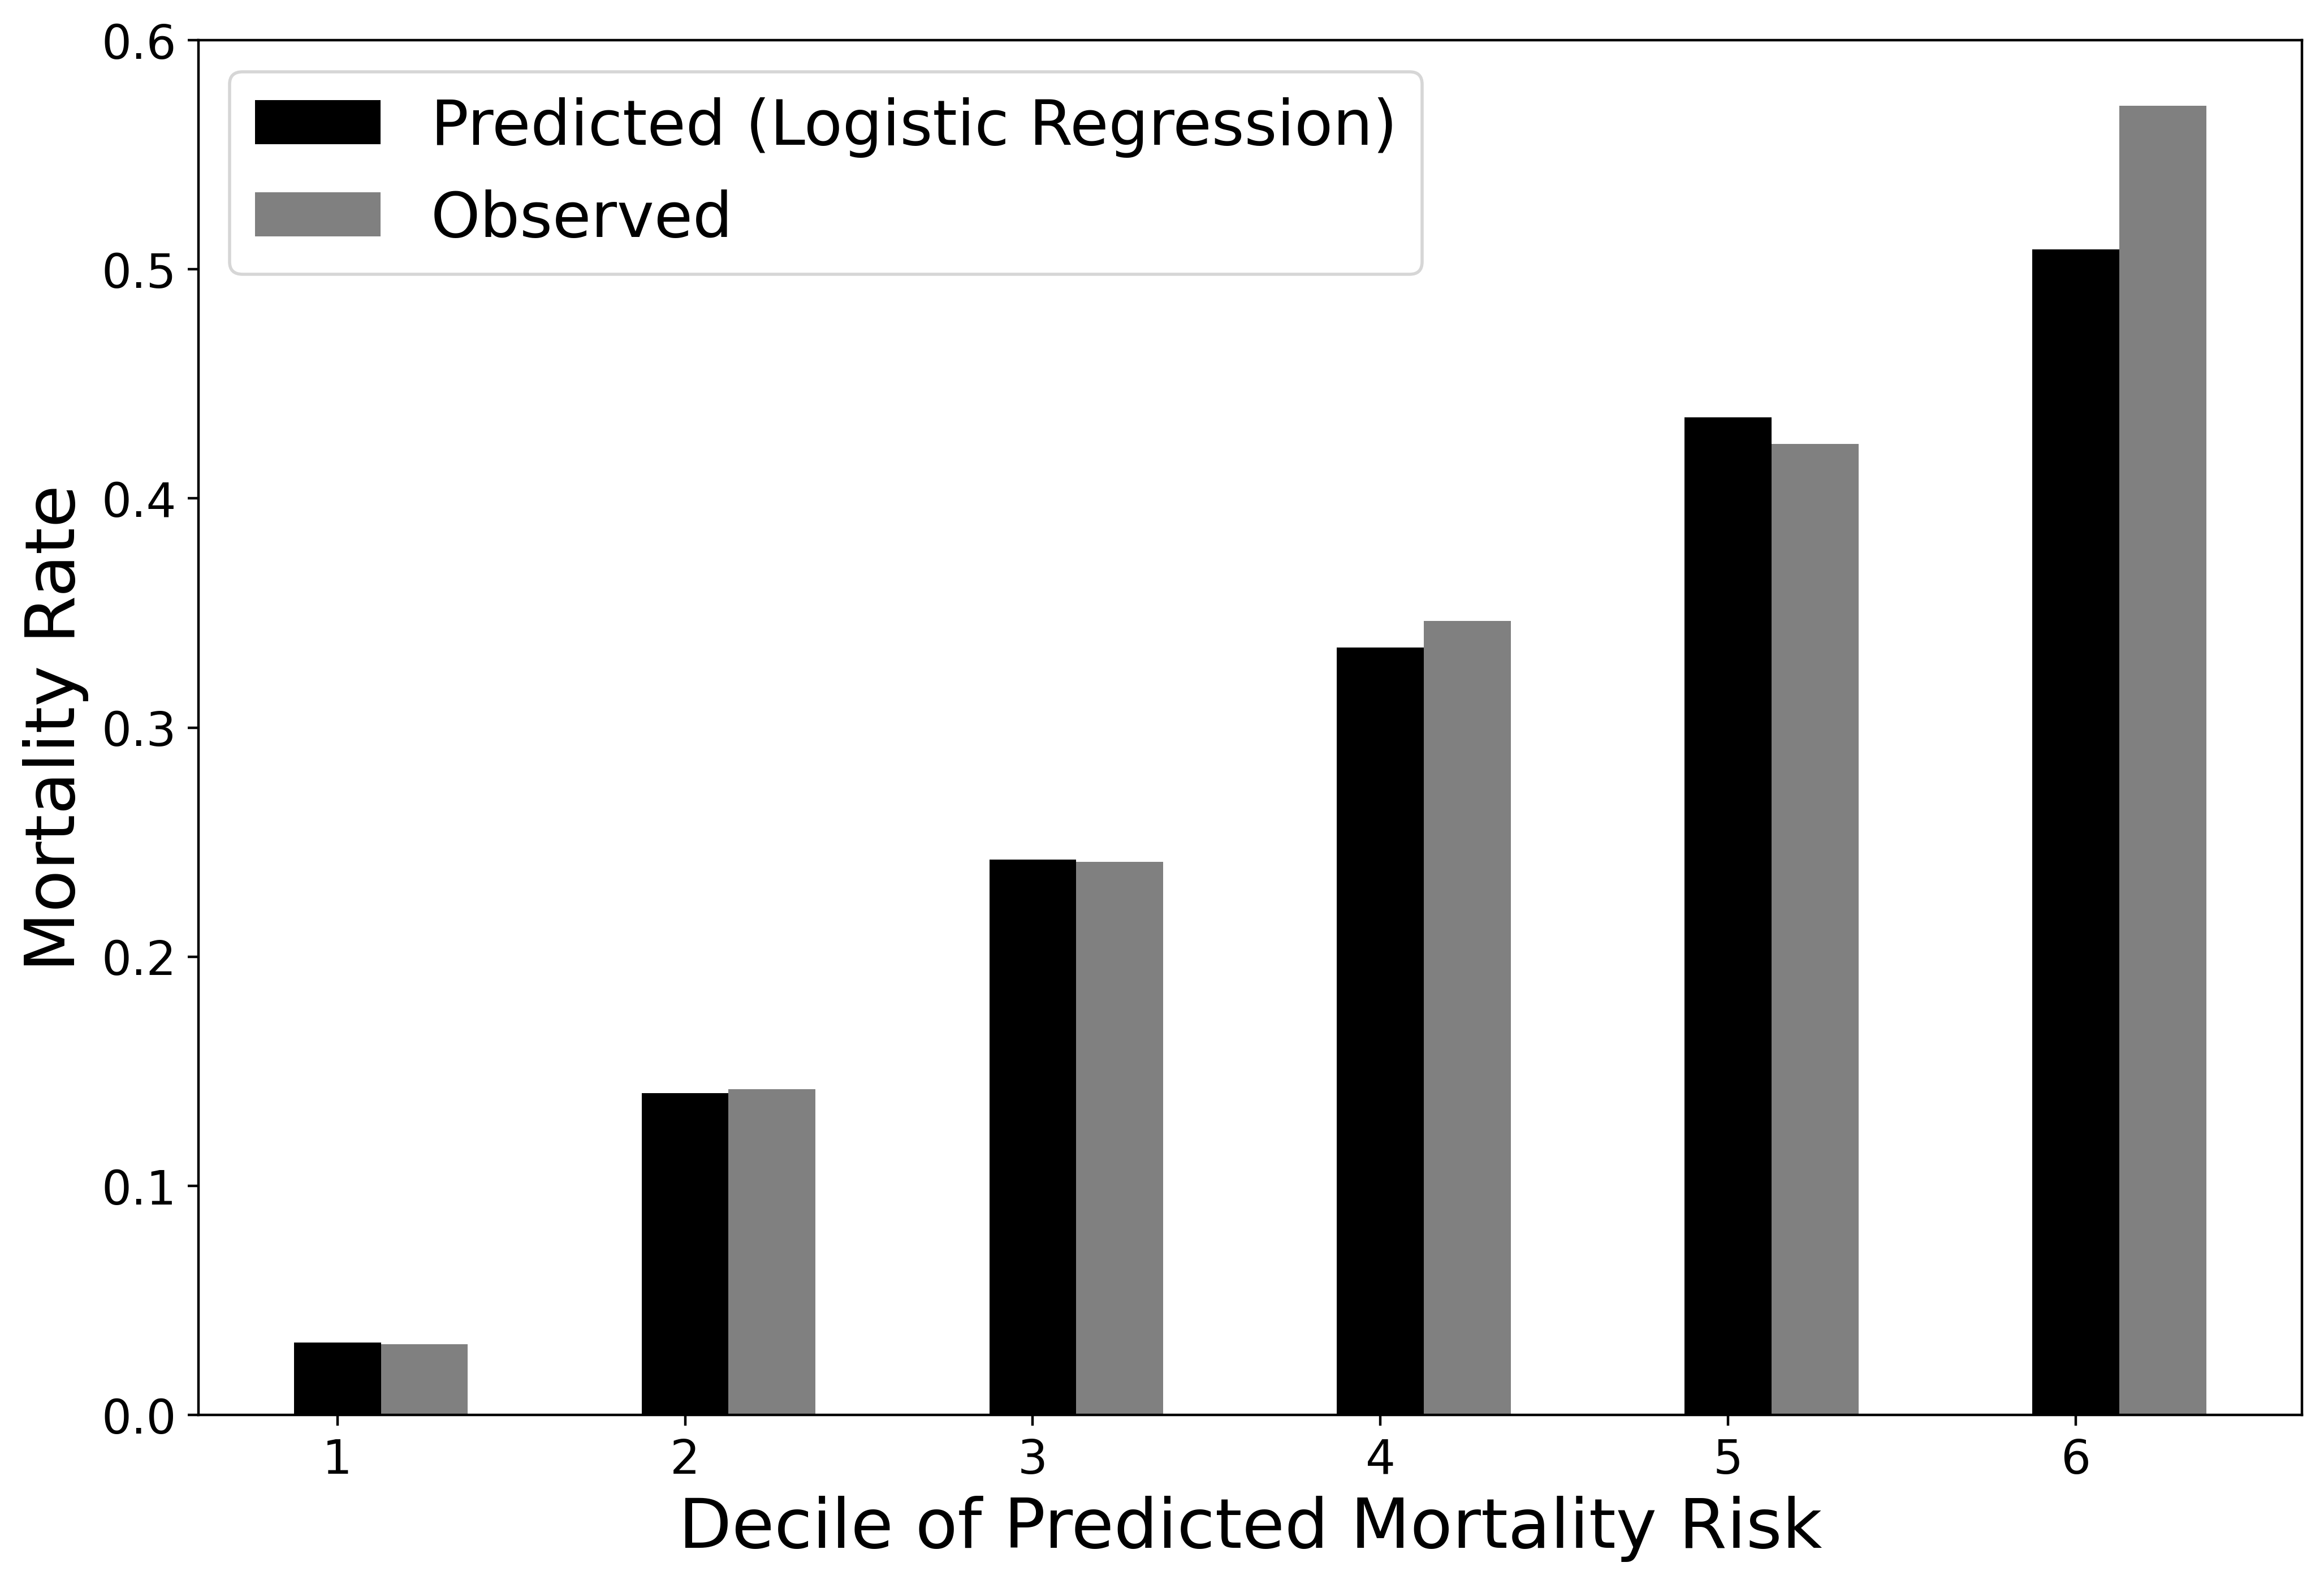

In [10]:
onc_plot_risk(
    y_true=calibrated_results.y, 
    y_proba=calibrated_results.p_calibrated, 
    label='Predicted (Logistic Regression)',
    filename='lr_mortality_bar')

# plot calibrated ROC AUC

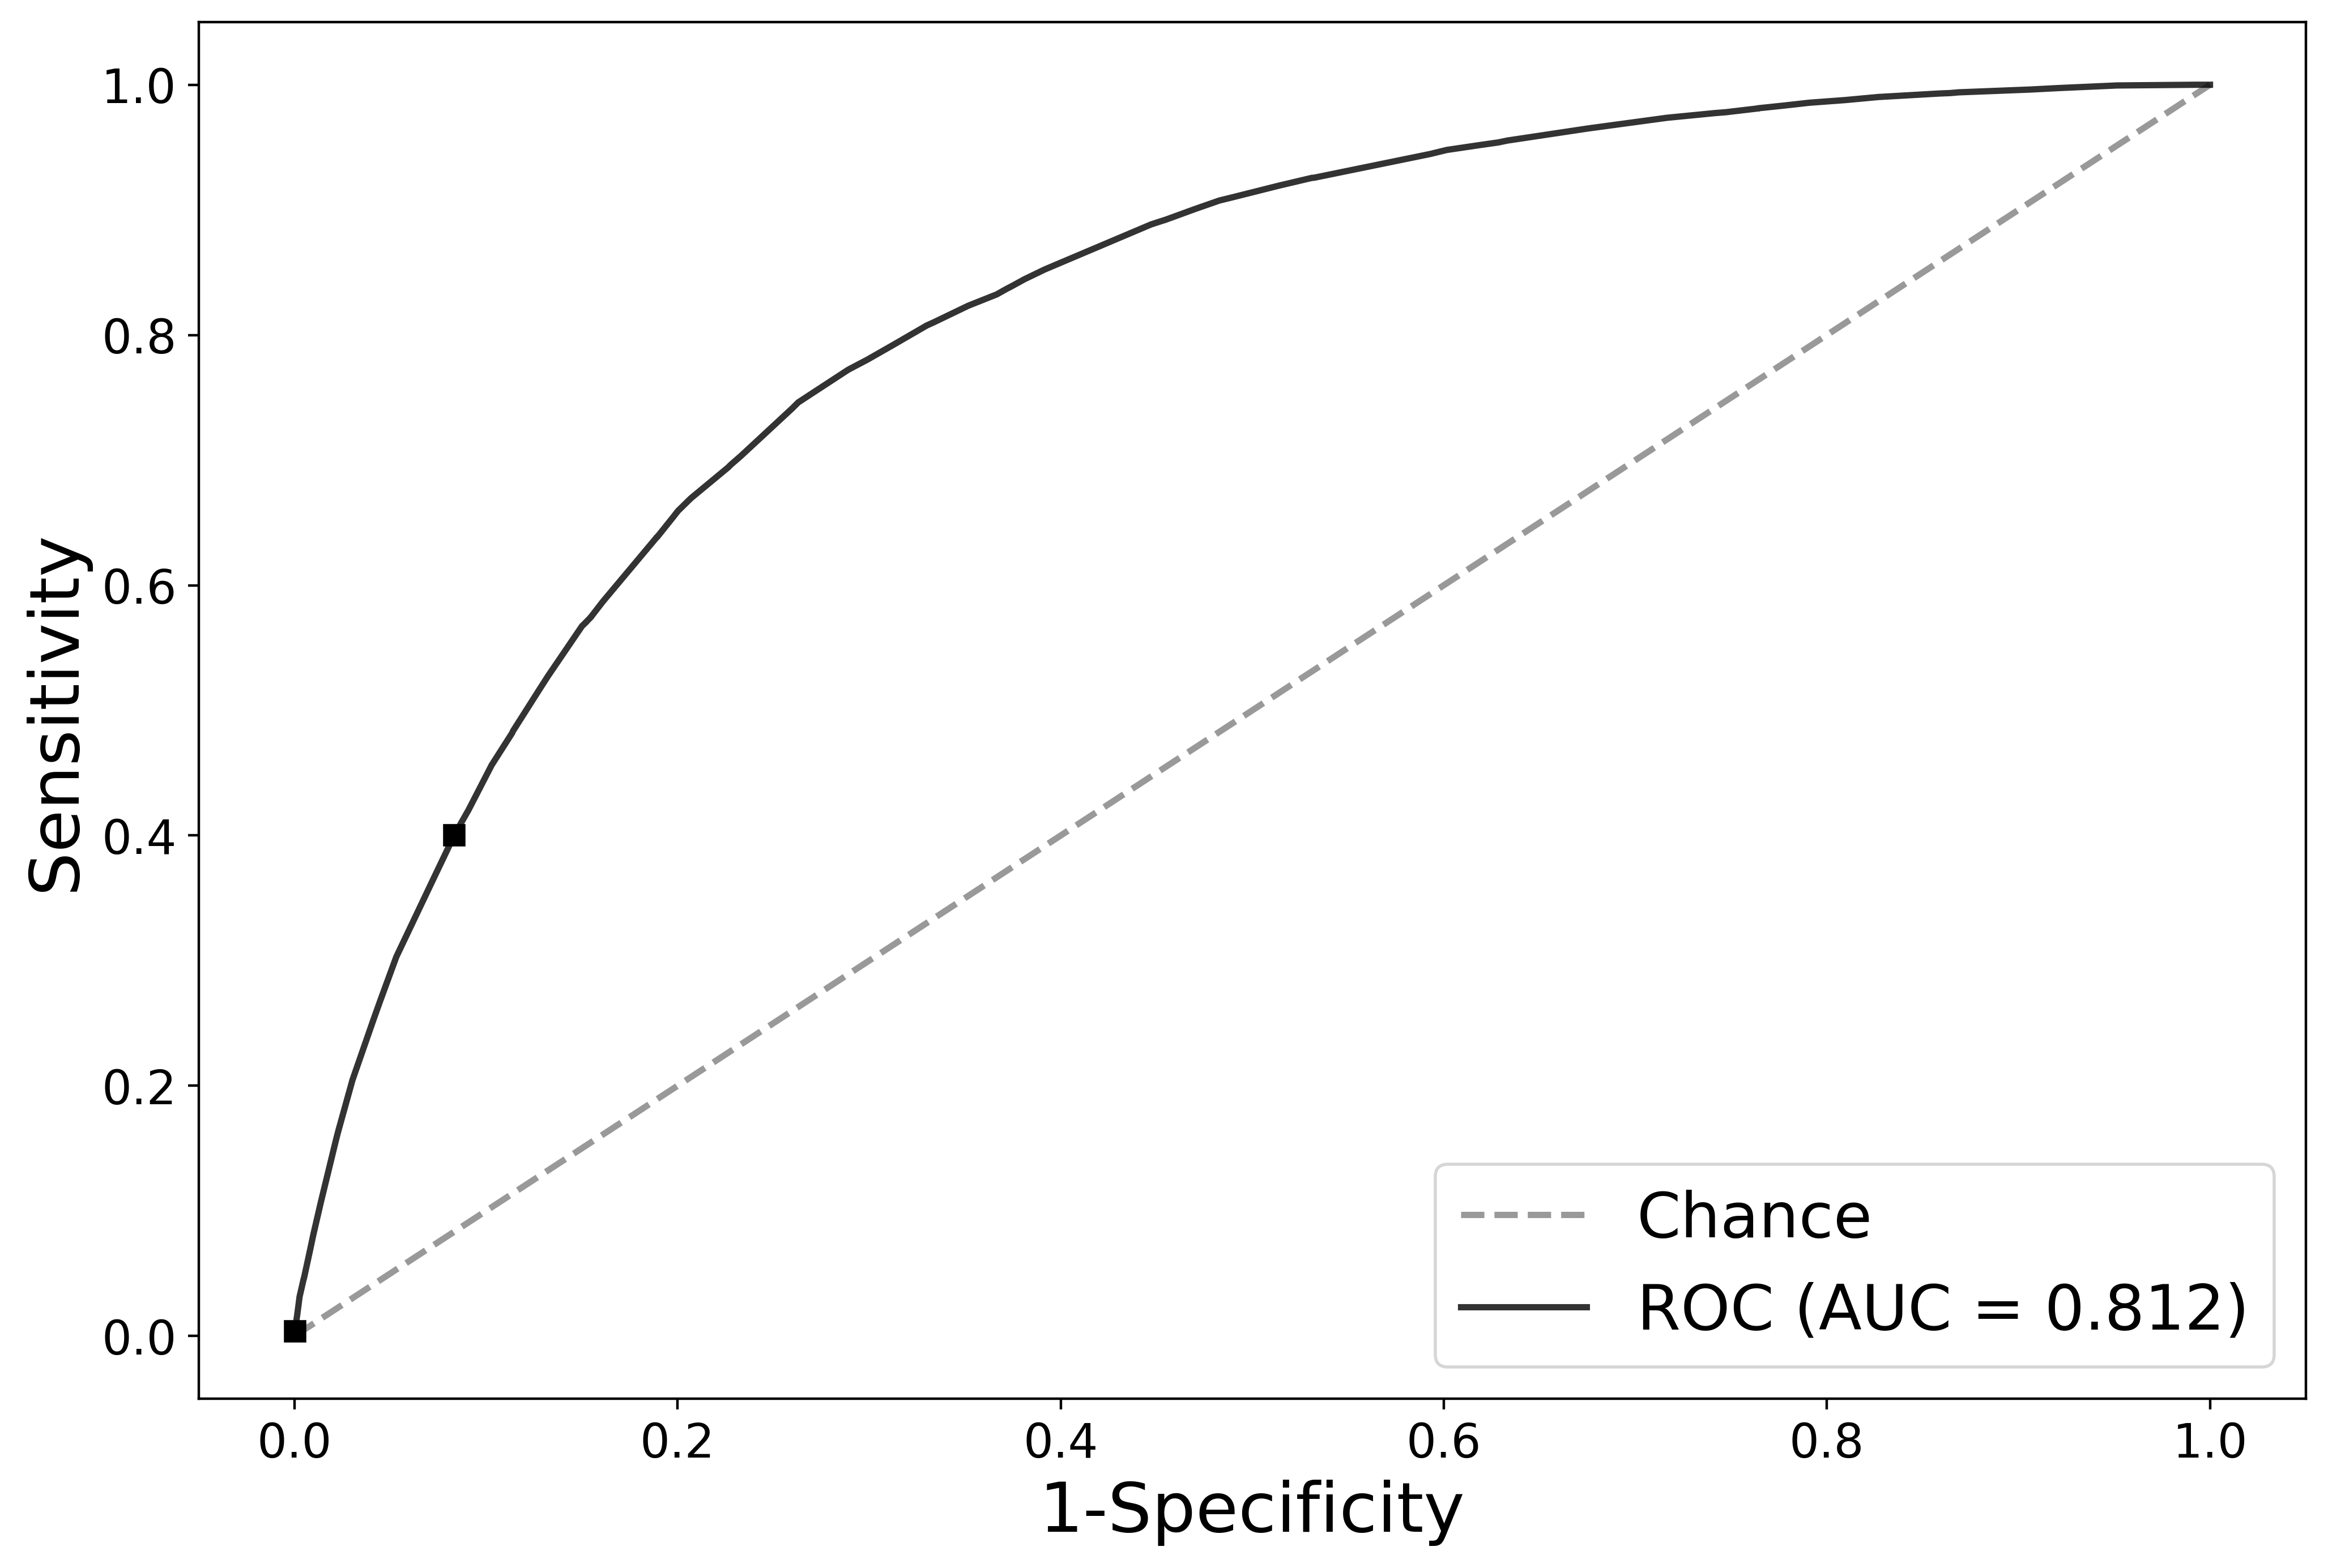

In [13]:
onc_plot_roc(
            y_true=calibrated_results.y, 
            y_pred=calibrated_results.p_calibrated, 
            model_name='lr_calibrated');

In [15]:
onc_plot_roc_no_threshold(y_true=calibrated_results.y, 
            y_pred=calibrated_results.p_calibrated, 
            model_name='lr_calibrated');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
